In [6]:
import re
from nltk import ngrams
from collections import Counter
import math

c:\Users\34644\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\34644\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


# **Dades**

Abans de començar el preprocessament, carreguem els fitxers de text corresponents als conjunts **d'entrenament** i **de test** per a cada idioma.

 
**Estructura del Corpus:**

El corpus està dividit en dos conjunts:

- **Conjunt d'entrenament**: Conté **30.000 frases** per cada idioma. 
- **Conjunt de test**: Conté **10.000 frases** per cada idioma. 



In [21]:
with open('./langId/ita_trn.txt', 'r', encoding='utf-8') as file:
    italia_train_raw = file.read()
with open('./langId/ita_tst.txt', 'r', encoding='utf-8') as file:
    italia_test_raw = file.read()
with open('./langId/eng_trn.txt', 'r', encoding='utf-8') as file:
    english_train_raw = file.read()
with open('./langId/eng_tst.txt', 'r', encoding='utf-8') as file:
    english_test_raw = file.read()
with open('./langId/fra_trn.txt', 'r', encoding='utf-8') as file:
    french_train_raw = file.read()
with open('./langId/fra_tst.txt', 'r', encoding='utf-8') as file:
    french_test_raw = file.read()
with open('./langId/deu_trn.txt', 'r', encoding='utf-8') as file:
    german_train_raw = file.read()
with open('./langId/deu_tst.txt', 'r', encoding='utf-8') as file:
    german_test_raw = file.read()
with open('./langId/nld_trn.txt', 'r', encoding='utf-8') as file:
    dutch_train_raw = file.read()
with open('./langId/nld_tst.txt', 'r', encoding='utf-8') as file:
    dutch_test_raw = file.read()
with open('./langId/spa_trn.txt', 'r', encoding='utf-8') as file:
    spanish_train_raw = file.read()
with open('./langId/spa_tst.txt', 'r', encoding='utf-8') as file:
    spanish_test_raw = file.read()


# **Preprocessat de les Dades**

En aquesta secció es defineixen les funcions de preprocessament de text seguint les recomanacions de la pràctica. Utilitzem la llibreria de **regular expressions** (`re`) per netejar i transformar el text.

## **Definició de funcions de preprocessament**

### `preproces_train(text)`

Aquesta funció prepara el text dels conjunts d'entrenament. Els passos principals són:

1. **Eliminar els dígits** del text.
2. **Convertir el text a minúscules** per evitar diferències entre majúscules i minúscules.
3. **Substituir múltiples espais per un de sol** per mantenir la consistència.
4. **Separar les frases per salt de línia** (`\n`).
5. **Concatenar les frases amb doble espai** (`'  '`), ja que ens interessa que el text d'entrenament estigui en una única seqüència.

### `preproces_test(text)`

El procés és similar al de `preproces_train`, amb una diferència clau:

- En comptes d'unir el text en una sola seqüència, es retorna una llista de frases per poder classificar cada un dels **10.000 tokens** individualment.


PD: A part d'aquest preprocessament, hem eliminat dels arxius raw (ubicats a la carpeta langId) l'última línia buida que tenen tots els arxius que utilitzem, tant de train com de test. Això ho hem fet després de veure que en alguns tests es classificaven 10.001 frases, i que totes aquestes frases buides es classificaven com a italià.


In [22]:
def preproces_train(text):
    text = re.sub(r'\d+', '', text)  # treure digits
    text = text.lower()  # passar a minusculas
    text = re.sub(r'  +', ' ', text)  # substituir els espais múltiples per un de sol
    sentences = text.split('\n') # separar cada item del document
    text = '  '.join(sentences)  # Concatenar frases amb doble espai
    return text

def preproces_test(text):
    text = re.sub(r'\d+', '', text)  # treure digits
    text = text.lower()  # passar a minusculas
    text = re.sub(r'  +', ' ', text)  # substituir els espais múltiples per un de sol
    sentences = text.split('\n') # separar cada item del document
    return sentences

# Aplico el preproces a les dades
italia_train = preproces_train(italia_train_raw)
italia_test = preproces_test(italia_test_raw)
english_train = preproces_train(english_train_raw)
english_test = preproces_test(english_test_raw)
french_train = preproces_train(french_train_raw)
french_test = preproces_test(french_test_raw)
german_train = preproces_train(german_train_raw)
german_test = preproces_test(german_test_raw)
dutch_train = preproces_train(dutch_train_raw)
dutch_test = preproces_test(dutch_test_raw)
spanish_train = preproces_train(spanish_train_raw)
spanish_test = preproces_test(spanish_test_raw)

# **Extracció i Filtrat de Trigrames**

En aquesta secció, extraiem **trigrames de caràcters** del text i filtrem aquells amb baixa freqüència (per evitar soroll)

## **Funció per obtenir els trigrames**

### `trigrams_train(text)`

Aquesta funció rep el text i retorna un diccionari amb la freqüència dels trigrames, eliminant aquells que apareixen menys de 5 vegades.

1. **Generació de trigrames** mitjançant la funció `ngrams(text, 3)`.
2. **Càlcul de la freqüència** de cada trigram amb `Counter()`.
3. **Filtrat de trigrames**: Eliminem aquells que apareixen menys de **5 vegades**.

In [23]:
def trigrams_train(text):
    finder = ngrams(text, 3)
    x = Counter(finder)
    # Eliminem els trigrames 
    x = {clau: valor for clau, valor in x.items() if valor >= 5}
    return x

#Apliquem la funcio sobre els conjunts d'entrenament de cada idioma 
trig_italia_train = trigrams_train(italia_train)
trig_english_train = trigrams_train(english_train)
trig_french_train = trigrams_train(french_train)
trig_german_train = trigrams_train(german_train)
trig_dutch_train = trigrams_train(dutch_train)
trig_spanish_train = trigrams_train(spanish_train)


# **Predicció d'idiomes amb trigrames**

En aquesta secció, implementem una funció per **classificar frases segons el seu idioma** utilitzant models basats en trigrames de caràcters i **suavitzat de Lidstone**.

## **Funció de predicció: `test_prediccions(frases)`**

Aquesta funció processa una llista de frases i retorna una llista amb les prediccions d'idioma.

### **Model de classificació**
1. Amb els trigrames prèviament calculats per cada idioma, definim la N com el sumatori de totes les freqüències dels trigrames del train d'un idioma; i definim la B com la quantitat de diferents trigrames que té el train d'un idioma.
2. **Aplicació del model a cada frase**:
   - Es generen els trigrames de la frase (de la mateixa forma que ho fem en el train).
   - Es calcula la probabilitat de la frase en cada idioma amb Lidstone Smoothing.
   - La puntuació total es calcula sumant els logs de les probabilitats dels trigrames.
   - L'idioma amb la millor puntuació es considera la predicció final.
3. **Retorn de les prediccions per cada frase**.



In [ ]:
def test_prediccions(frases):
    prediccions = []
    
    dict_idiomes = {
        'italian': trig_italia_train,
        'english': trig_english_train,
        'french': trig_french_train,
        'german': trig_german_train,
        'dutch': trig_dutch_train,
        'spanish': trig_spanish_train
    }
    
    # Paràmetre alpha de Lidstone
    alpha = 0.5

    for frase in frases:
        finder = ngrams(frase, 3)
        tirgrames_frase = dict(Counter(finder))
        millor_puntuacio = float('-inf')
        millor_idioma = None
        
        for language, model in dict_idiomes.items():
            # Vocabulari total de trigrames per a aquest idioma
            total_trigrams = sum(model.values()) #N
            quantitat_trigrames = len(model) #B
        
            puntuacio = 0
            
            # Avaluar cada trigrama de la frase
            for trigram, freq in tirgrames_frase.items(): 
                # On N és el total de trigrames i B és la quantitat de diferents trigrames que té el train del idioma que estem avaluant
                aparicions_trigrama = model.get(trigram, 0)
                # Implementar Lidstone smoothing
                probabilitat = (aparicions_trigrama + alpha) / (total_trigrams + alpha * quantitat_trigrames)
                
                #Com tenim un diccionari dels diferents trigrames de la frase q volem analitzar i tmb sabem quans cops es repeteix el trigrama a la frase
                #simplement multipliquem la quantitat de vegades que apareix aquell trigrama a la frase per el log de la seva probabilitat
                puntuacio += freq * math.log(probabilitat)
            
            # Guardar el millor idioma
            if puntuacio > millor_puntuacio:
                millor_puntuacio = puntuacio
                millor_idioma = language
        
        prediccions.append(millor_idioma)
   
    return prediccions

pred_test_italia = test_prediccions(italia_test)
pred_test_english = test_prediccions(english_test)
pred_test_french = test_prediccions(french_test)
pred_test_german = test_prediccions(german_test)
pred_test_dutch = test_prediccions(dutch_test)
pred_test_spanish = test_prediccions(spanish_test)

# Guardem les frequencies de les prediccions per a cada idioma
italia_test_result = dict(Counter(pred_test_italia))
english_test_result = dict(Counter(pred_test_english))
french_test_result = dict(Counter(pred_test_french))
german_test_result = dict(Counter(pred_test_german))
dutch_test_result = dict(Counter(pred_test_dutch))
spanish_test_result = dict(Counter(pred_test_spanish))
   

In [25]:
print(len(italia_test),italia_test_result)
print(len(english_test), english_test_result)
print(len(german_test),german_test_result)
print(len(dutch_test),dutch_test_result)
print(len(french_test),french_test_result)
print(len(spanish_test),spanish_test_result)

10000 {'italian': 9986, 'german': 1, 'french': 2, 'spanish': 5, 'english': 6}
9987 {'english': 9983, 'dutch': 3, 'french': 1}
9990 {'german': 9982, 'dutch': 5, 'english': 3}
10000 {'dutch': 9975, 'spanish': 1, 'german': 8, 'english': 12, 'italian': 3, 'french': 1}
10000 {'french': 9989, 'dutch': 3, 'german': 2, 'english': 3, 'italian': 2, 'spanish': 1}
10000 {'spanish': 9992, 'italian': 4, 'english': 3, 'french': 1}


# **Avaluació del Model: Matriu de Confusió**

Per analitzar el rendiment del model, construïm una **matriu de confusió**, que ens permet veure **com es classifiquen les frases de cada idioma**.

## **Construcció de la Matriu de Confusió**

1. **Recollida de dades**:
   - Creem dues llistes:  
     - `idioma_real`: Conté l'idioma real de cada frase.
     - `idioma_pred`: Conté l'idioma predit pel model.
   - Per cada idioma, afegim les prediccions corresponents en la quantitat observada.


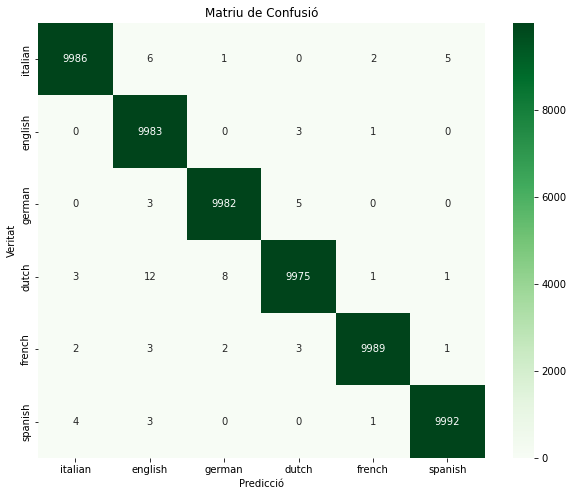

In [27]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Crear llistes amb les etiquetes reals i prediccions
idioma_real = []
idioma_pred = []

idiomes = ['italian', 'english', 'german', 'dutch', 'french', 'spanish']
results_dict = {
    'italian': italia_test_result,
    'english': english_test_result,
    'german': german_test_result,
    'dutch': dutch_test_result,
    'french': french_test_result,
    'spanish': spanish_test_result
}

for true_idioma, prediccions in results_dict.items():
    for pred_idioma, count in prediccions.items():
        # Afegir l'etiqueta real count vegades
        idioma_real.extend([true_idioma] * count)
        # Afegir l'etiqueta predita count vegades
        idioma_pred.extend([pred_idioma] * count)

cm = confusion_matrix(idioma_real, idioma_pred, labels=idiomes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=idiomes, yticklabels=idiomes)
plt.xlabel('Predicció')
plt.ylabel('Veritat')
plt.title('Matriu de Confusió')
plt.show()


# **Anàlisi Detallat de les Prediccions**

A més de la matriu de confusió, realitzem una anàlisi més detallada per identificar els errors específics del model.

## **Passos de l'Anàlisi**

1. **Detecció d'Errors**  
   - Per cada idioma, guardem les frases que han estat classificades incorrectament.
   - Emmagatzemem:
     - La frase original.
     - L'idioma predit incorrectament.
     - L'idioma real.

2. **Visualització dels Errors**  
   - Mostrem les frases mal classificades agrupades segons l'idioma predit incorrectament.

3. **Resum Global**  
   - Calculem l'exactitud general del model sobre tot el conjunt de test.
   - Mostrem el nombre total de frases correctes i incorrectes.

In [37]:
def frases_classificades_malament(frases,res_test, idioma_real):
    frases_mal_classificades = []
    
    # Guardar les frases mal classificades
    for i, (frase, predit_lang) in enumerate(zip(frases, res_test)):
        if predit_lang != idioma_real:
            frases_mal_classificades.append({
                'frase': frase,
                'predit': predit_lang,
                'true': idioma_real
            })
    
    return {
        'predictions': Counter(res_test),
        'incorrectes': frases_mal_classificades
    }

# Executar les prediccions amb detalls
italia_resultats_amb_detall = frases_classificades_malament(italia_test, pred_test_italia ,'italian')
english_resultats_amb_detall = frases_classificades_malament(english_test,pred_test_english, 'english')
german_resultats_amb_detall = frases_classificades_malament(german_test, pred_test_german,'german')
dutch_resultats_amb_detall = frases_classificades_malament(dutch_test, pred_test_dutch,'dutch')
french_resultats_amb_detall = frases_classificades_malament(french_test, pred_test_french,'french')
spanish_resultats_amb_detall = frases_classificades_malament(spanish_test, pred_test_spanish,'spanish')

# Diccionari amb les prediccions de cada idioma i les frases mal classificades 
resultats_dict_detallat = {
    'italian': italia_resultats_amb_detall,
    'english': english_resultats_amb_detall,
    'german': german_resultats_amb_detall,
    'dutch': dutch_resultats_amb_detall,
    'french': french_resultats_amb_detall,
    'spanish': spanish_resultats_amb_detall
}

# Funció per mostrar les frases incorrectes
def display_frases_mal_classificades(results_dict):
    for true_lang, results in results_dict.items():
        incorrectes = results['incorrectes']
        total = sum(results['predictions'].values())
        num_incorrect = len(incorrectes)
        accuracy = ((total - num_incorrect) / total) * 100 
        
        print(f"\n{'='*80}")
        print(f"IDIOMA: {true_lang.upper()} - Exactitud: {accuracy:.2f}% ({total-num_incorrect}/{total})")
        print(f"{'='*80}")
        
        print(f"Frases mal classificades ({num_incorrect}):")
        print(f"{'='*80}")
        
        # Agrupar per idioma predit incorrectament
        by_predit = {}
        for item in incorrectes:
            pred = item['predit']
            if pred not in by_predit:
                by_predit[pred] = []
            by_predit[pred].append(item['frase'])
        
        # Mostrar les frases agrupades per idioma predit
        for pred_idioma, frases in by_predit.items():
            print(f"\nClassificades incorrectament com a {pred_idioma} ({len(frases)} frases):")
            print(f"{'-'*70}")
            for i, frase in enumerate(frases, 1):  
                print(f"{i}. {frase}")
                
                
# Mostrar els resultats
display_frases_mal_classificades(resultats_dict_detallat)

# Calcular i mostrar estadístiques globals
total_frases = sum(sum(results['predictions'].values()) for results in resultats_dict_detallat.values())
total_incorrectes = sum(len(results['incorrectes']) for results in resultats_dict_detallat.values())
accuracy_global = ((total_frases - total_incorrectes) / total_frases) * 100 if total_frases > 0 else 0

print(f"\n{'='*80}")
print(f"RESUM GLOBAL")
print(f"{'='*80}")
print(f"Total de frases analitzades: {total_frases}")
print(f"Total de frases correctament classificades: {total_frases - total_incorrectes}")
print(f"Total de frases mal classificades: {total_incorrectes}")
print(f"Exactitud global: {accuracy_global:.2f}%")




IDIOMA: ITALIAN - Exactitud: 99.86% (9986/10000)
Frases mal classificades (14):

Classificades incorrectament com a german (1 frases):
----------------------------------------------------------------------
1. 	sachsenring - passo indietro per marco melandri al sachsenring.

Classificades incorrectament com a french (2 frases):
----------------------------------------------------------------------
1. 	champions o europa league?
2. 	durante la .a tappa del tour de france, saint girons-crête du lys, perde la vita fabio casartelli.

Classificades incorrectament com a spanish (5 frases):
----------------------------------------------------------------------
1. 	premi alla carriera a brian yuzna e robert englund.
2. 	arriva alvaro gonzalez, ennesimo talento made in uruguay.
3. 	ah, se lo chiede pure?
4. 	non sono le madri dei desaparecidos a protestare nella plaza de mayo a buenos ayres, ma i veterani della guerra delle falkland.
5. 	"dal sud", dice.

Classificades incorrectament com a engl